In [19]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [20]:
import mlxtend #apiori알고리즘 관련 라이브러리

In [21]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

In [22]:
data = np.array([
    ['우유', '기저귀', '쥬스'],
    ['양상추', '기저귀', '맥주'],
    ['우유', '양상추', '기저귀', '쥬스'],
    ['양상추', '맥주']
])

In [23]:
from mlxtend.preprocessing import TransactionEncoder

In [24]:
te = TransactionEncoder()

In [25]:
te_ary = te.fit(data).transform(data)
te_ary

array([[ True, False, False,  True,  True],
       [ True,  True,  True, False, False],
       [ True, False,  True,  True,  True],
       [False,  True,  True, False, False]])

In [26]:
te.columns_

['기저귀', '맥주', '양상추', '우유', '쥬스']

In [42]:
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,기저귀,맥주,양상추,우유,쥬스
0,True,False,False,True,True
1,True,True,True,False,False
2,True,False,True,True,True
3,False,True,True,False,False


In [43]:
from mlxtend.frequent_patterns import apriori

In [44]:
result = apriori(df, min_support = 0.5, use_colnames=True)

In [45]:
#주스+우유를 함께 산 사람에게 추천을 해준다고 한다면, 
##맥주보다는 기저귀를 추천해야 함 
##비지도 기반으로 판단 

In [46]:
##one -hot 인코딩 방식의 테이블이 필요 
##실제로는 물건의 개수가 아주 많음 
##==>0이 2차원 데이터 : 희소행렬(sparse matrix)
##TF-IDF , CounterVectorizer, TransactionEncoder

In [47]:
apriori(df, min_support=0.7, use_colnames=True)


,support,itemsets
0,0.75,(기저귀)
1,0.75,(양상추)


In [48]:
type(result)

pandas.core.frame.DataFrame

In [49]:
#result에서 마지막 itemsets컬럼값 추출 
##쥬스, 우유와 함께 추천하면 좋을 item은??

In [50]:
choice = result.iloc[10,:]
choice

support               0.5
itemsets    (쥬스, 기저귀, 우유)
Name: 10, dtype: object

In [51]:
items = choice['itemsets']
items

frozenset({'기저귀', '우유', '쥬스'})

In [53]:
list(items)[1]

'기저귀'

In [54]:
pip install gensim

  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.24
    Uninstalling Cython-0.29.24:
      Successfully uninstalled Cython-0.29.24
Note: you may need to restart the kernel to use updated packages.


In [55]:
from gensim.models import Word2Vec

In [56]:
##자연어에서 특정한 단어(word)를 중심으로 앞 뒤의 단어를 유추(예측, 추론)할 때 사용됨. 

In [57]:
doc = [
    'you say goodbye and I say hello', 
    'i say happy or he said white', 
    'we say unhappy and angry black'
]

In [58]:
doc2 = [
    '나는 굿바이라고 했고, 너는 헬로우라고 했어.', 
    '나는 기쁘다고 했고, 너는 하얗게 슬프다고 했어.', 
    '우리는 행복하지 않고, 블랙으로 슬퍼'
]

In [61]:
##문장을 토큰으로 끊어내자 
sentences = [sentence.split(' ') for sentence in doc]
sentences

[['you', 'say', 'goodbye', 'and', 'I', 'say', 'hello'],
 ['i', 'say', 'happy', 'or', 'he', 'said', 'white'],
 ['we', 'say', 'unhappy', 'and', 'angry', 'black']]

In [62]:
##문장을 토큰으로 끊어내자 
sentences2 = [sentence.split(' ') for sentence in doc2]
sentences2

[['나는', '굿바이라고', '했고,', '너는', '헬로우라고', '했어.'],
 ['나는', '기쁘다고', '했고,', '너는', '하얗게', '슬프다고', '했어.'],
 ['우리는', '행복하지', '않고,', '블랙으로', '슬퍼']]

In [77]:
model = Word2Vec(window = 1, min_count = 1) #Shift + Tab으로 정보를 볼 수 있음 
                                            #특정한 단어의 앞뒤 단어를 유추가능 
##window: 유추하는 계산을 할 때 특정한 단어의 앞뒤 몇개를 가지고 계산을 할 지의 단위 
##min_count: 특정한 패턴의 출현 횟수 
model2 = Word2Vec(window = 1, min_count= 1)

In [78]:
model2.build_vocab(sentences2)

In [79]:
model.build_vocab(sentences) #영문문장을 가지고 계산을 함 

In [71]:
## 특정한 단어를 주고 앞뒤 단어를 추론해보자. 
model.wv.most_similar('say') ##비지도!! 

[('angry', 0.16072483360767365),
 ('unhappy', 0.13725273311138153),
 ('black', 0.12300863116979599),
 ('and', 0.06797593832015991),
 ('or', 0.03364057466387749),
 ('hello', 0.009391162544488907),
 ('white', 0.008315935730934143),
 ('I', 0.0045030261389911175),
 ('we', -0.003644434502348304),
 ('you', -0.010839177295565605)]

In [75]:
model.wv.most_similar('or')

[('goodbye', 0.19912061095237732),
 ('and', 0.07497556507587433),
 ('hello', 0.060591842979192734),
 ('he', 0.044689226895570755),
 ('white', 0.0377129502594471),
 ('say', 0.03364058583974838),
 ('you', 0.027057481929659843),
 ('said', 0.026806797832250595),
 ('i', 0.008826158009469509),
 ('black', -0.014541256241500378)]

In [76]:
## or단어 앞으로는 say가 나올 가능성이 높고 
## or단어 뒤로는 black 단어가 나올 가능성이 제일 큰것을 알 수 있다. 

In [80]:
model2.wv.most_similar('너는')

[('굿바이라고', 0.13725273311138153),
 ('나는', 0.06797593832015991),
 ('우리는', 0.03364057466387749),
 ('블랙으로', 0.009391162544488907),
 ('기쁘다고', 0.008315935730934143),
 ('슬퍼', 0.0045030261389911175),
 ('헬로우라고', -0.0036444442812353373),
 ('했어.', -0.010839177295565605),
 ('했고,', -0.023671656847000122),
 ('슬프다고', -0.09575343877077103)]

In [81]:
#'너는' 한글 단어 앞으로 나올 단어로는 굿바이라고를 추천, 
# '너는' 한글 단어 뒤로 나올 단어로는 헬로우라고를 추천 

In [82]:
import pandas as pd 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [84]:
tfidf = TfidfVectorizer(stop_words = 'english') #불용어처리 가능한 tfidf객체 생성 
#tfidf는 빈도수를 구하긴 하지만, 문서마다 자주 등장하는 문서는 각 문서를 구분할 
#단어로 사용하기는 부적합하여 가중치를 낮추어 계산 

In [85]:
tfidf_matrix = tfidf.fit_transform(doc)
tfidf_matrix
#print('TF-IDF 행렬의 크기(shape)')

<3x9 sparse matrix of type '<class 'numpy.float64'>'
	with 11 stored elements in Compressed Sparse Row format>

In [86]:
## 3x 9에서 
## 3은 문서의 개수 
## 9는 단어의 개수 

In [88]:
tfidf_matrix.toarray()

array([[0.        , 0.        , 0.54270061, 0.        , 0.54270061,
        0.        , 0.64105545, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.54645401, 0.        ,
        0.54645401, 0.32274454, 0.        , 0.54645401],
       [0.54645401, 0.54645401, 0.        , 0.        , 0.        ,
        0.        , 0.32274454, 0.54645401, 0.        ]])

In [89]:
#문서 간의 유사도를 구해봅니다 
cosine_similarity(tfidf_matrix, tfidf_matrix)

array([[1.        , 0.20689715, 0.20689715],
       [0.20689715, 1.        , 0.10416404],
       [0.20689715, 0.10416404, 1.        ]])

In [92]:
## 행은 문서1, 문서2, 문서3 
## 열도 문서1, 문서2, 문서3 
##문서1 + 문서2: 0.21
##문서1 + 문서3: 0.21
##문서2 + 문서3: 0.10
##문서1과 2, 문서 1과 3이 유사하다 
##문서2와 3은 유사하지 않다. 

In [94]:
#1.장바구니 유사도를 구해보세요 
#2.장바구니 1번과 제일 유사도가 높은 장바구니를 찾아서 
#3.장바구니 1번에게 추천해주고 싶은 item을 추천해주세요 

In [96]:
cosine_similarity(df, df) #TransactionEncoding한 것으로 사용 

array([[1.        , 0.33333333, 0.8660254 , 0.        ],
       [0.33333333, 1.        , 0.57735027, 0.81649658],
       [0.8660254 , 0.57735027, 1.        , 0.35355339],
       [0.        , 0.81649658, 0.35355339, 1.        ]])

In [97]:
## 장바구니 1번 + 2번 : 0.33
## 장바구니 1번 + 3번 : 0.87
## 장바구니 1번 + 4번 : 0.00
## 장바구니 2번 + 3번 : 0.58
## 장바구니 2번 + 4번 : 0.82
## 장바구니 3번 + 4번 : 0.35

In [98]:
basket_name = ['1번+2번', '1번 +3번', '1번+4번', '2번+3번', '2번+4번','3번+4번']
similar = [0.33,0.87,0.00,0.58,0.82,0.35]

In [100]:
basket_df = pd.DataFrame({'basket_name': basket_name, 'similar':similar})
basket_df

,basket_name,similar
0,1번+2번,0.33
1,1번 +3번,0.87
2,1번+4번,0.00
3,2번+3번,0.58
4,2번+4번,0.82
5,3번+4번,0.35


In [102]:
import matplotlib as mpl
import matplotlib.font_manager as fm 
from matplotlib import pyplot as plt 
%config inlineBackend.figure_format = 'retina'

plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (14,4)

<AxesSubplot:xlabel='basket_name', ylabel='similar'>

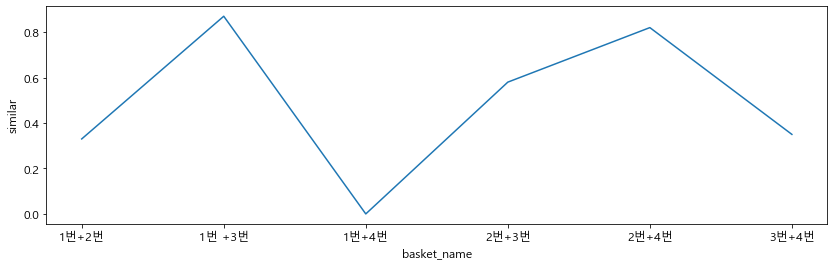

In [103]:
import seaborn as sns 
sns.lineplot(x="basket_name",y="similar", data = basket_df)

In [ ]:
## TransactionEncoder: one-hot 
## CounterVectorizer: count amount 
## TF-IDFVectorizer : reduce most frequency weight